<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Trabajo Practico</h3>
    <h5>Grupo 4</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Braian Drago <p>
        <p>Integrantes: Garnica Hernán - Scime Silvia
</div>

**Serie de tiempo: KMS**


Importamos módulos a utilizar

In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pmdarima as pm
from scipy.stats import probplot
import warnings
warnings.filterwarnings('ignore')

####  Leemos los datos a trabajar


In [220]:
url='https://raw.githubusercontent.com/jiang-011/AST_G4/main/dataset/Kilometros_TP.csv'
raw_csv_data = pd.read_csv(url, sep=',', decimal='.')
df_km=raw_csv_data.copy()

#### Breve resumen del dataset


In [221]:
print(df_km.columns)

Index(['Fecha', 'KM'], dtype='object')


In [222]:
df_km.describe(include='all')

,Fecha,KM
count,761,761.000000
unique,761,NaN
top,2023-03-18,NaN
freq,1,NaN
mean,NaN,73506.130891
std,NaN,23975.028897
min,NaN,18.976000
25%,NaN,52063.096000
50%,NaN,75190.790000
75%,NaN,96904.004000


In [223]:
df_km.head(10)

,Fecha,KM
0,2023-03-18,66686.513
1,2023-05-09,105009.277
2,2023-02-28,80447.065
3,2023-03-06,103403.154
4,2023-03-10,102574.717
5,2023-05-11,104149.399
6,2023-03-21,102278.464
7,2023-04-24,103627.203
8,2023-04-18,103366.435
9,2023-05-31,103403.519


In [224]:
df_km.tail(10)

,Fecha,KM
751,2022-04-09,48305.086
752,2022-01-29,47482.883
753,2023-07-23,45117.943
754,2022-01-11,50103.326
755,2022-12-18,17554.422
756,2022-04-26,23536.646
757,2023-06-13,47.508
758,2022-10-12,49.673
759,2022-05-17,54.524
760,2022-10-13,18.976


Adaptamos el dataset para trabajarlo segun sus series temporales

In [225]:
df_km.Fecha = pd.to_datetime(df_km.Fecha, dayfirst = True)

In [226]:
df_km.Fecha.describe()

count                              761
mean     2022-10-15 04:07:53.061760768
min                2021-09-30 00:00:00
25%                2022-04-08 00:00:00
50%                2022-10-15 00:00:00
75%                2023-04-23 00:00:00
max                2023-10-31 00:00:00
Name: Fecha, dtype: object

Aplicamos filtro de 2 años de duración al campo Fecha (2021-10-01-2023-10-31)

In [227]:
df_km = df_km[(df_km['Fecha'] >= '2021-10-01') & (df_km['Fecha'] <= '2023-10-31')]
df_km = df_km.sort_values(by=['Fecha'], ascending=True)
df_km = df_km.reset_index(drop=True)

In [228]:
df_km.head(10)

,Fecha,KM
0,2021-10-01,73177.190
1,2021-10-02,49300.256
2,2021-10-03,34024.972
3,2021-10-04,73453.515
4,2021-10-05,73722.635
5,2021-10-06,73465.563
6,2021-10-07,49462.478
7,2021-10-08,35282.426
8,2021-10-09,48384.782
9,2021-10-10,34785.451


In [229]:
df_km.tail(10)

,Fecha,KM
750,2023-10-22,47321.881
751,2023-10-23,101572.556
752,2023-10-24,101884.237
753,2023-10-25,102691.406
754,2023-10-26,102253.728
755,2023-10-27,102590.551
756,2023-10-28,62622.827
757,2023-10-29,44060.420
758,2023-10-30,101843.308
759,2023-10-31,102381.640


Analisis de fechas duplicadas

In [230]:
# Detectar valores duplicados en la columna 'fecha'
fechas_duplicadas = df_km[df_km.duplicated(subset=['Fecha'])]

In [231]:
fechas_duplicadas

,Fecha,KM


In [232]:
from skimpy import skim

In [233]:
skim(df_km)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 760    │ │ datetime64  │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ KM              │   0 │      0 │   74000 │   24000 │  19 │   52000 │   75000 │   97000 │  110000 │  ▁▅▃▅▇  │  │
│ └─────────────────┴─────┴────────┴─────────┴─────────┴─────┴─────────┴─────────┴─────────┴─────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ Fecha                  │      0 │         0 │     2021-10-01      │     2023-10-31      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Seteamos como index del dataset segun el dia

In [234]:
df_km.set_index("Fecha",inplace=True)

In [235]:
df_km.head()

,KM
Fecha,
2021-10-01,73177.190
2021-10-02,49300.256
2021-10-03,34024.972
2021-10-04,73453.515
2021-10-05,73722.635


#### Adaptamos el datset a la frecuencia diaria

In [236]:
df_km=df_km.asfreq('d')
df_km

,KM
Fecha,
2021-10-01,73177.190
2021-10-02,49300.256
2021-10-03,34024.972
2021-10-04,73453.515
2021-10-05,73722.635
...,...
2023-10-27,102590.551
2023-10-28,62622.827
2023-10-29,44060.420


Verificamos existencia de fechas nulas

In [237]:
df_km.isna().sum()

KM    1
dtype: int64

Obtenemos posición del registro con kms nulos

In [238]:
fila_con_na = df_km[df_km.KM.isna()].reset_index().Fecha

In [239]:
fila_con_na

0   2023-06-22
Name: Fecha, dtype: datetime64[ns]

In [240]:
from datetime import timedelta

Este día no aparece con km en el dataset, le imputamos el valor promedio del dia de la semana anterior y posterior

In [241]:
df_km.loc[fila_con_na[0], "KM"] = (df_km.loc[fila_con_na[0] + timedelta(days=-7), "KM"] + df_km.loc[fila_con_na[0] + timedelta(days=7), "KM"])/2

Volvemos a verificar existencia de valores nulos

In [242]:
df_km.isna().sum()

KM    0
dtype: int64

Verificamos existencia de aquellos valores que sean muy bajos (menores a 30.000 km)

In [243]:
df_bajos= df_km[df_km['KM'] < 30000].reset_index().Fecha
df_bajos

0   2022-01-01
1   2022-01-09
2   2022-04-26
3   2022-05-17
4   2022-10-12
5   2022-10-13
6   2022-12-18
7   2023-06-13
Name: Fecha, dtype: datetime64[ns]

Estos días hubo paro de transporte, lo que estaría explicando la cantidad escasa de kms recorridos por las unidades (posible vuelta al punto de línea o llevarlos a los talleres, por ej.)

Entonces se aplica mismo criterio de promediar con los km del mismo día de la semana anterior y posterior.

In [244]:
for i in df_bajos:
  df_km.loc[i, "KM"] = (df_km.loc[i + timedelta(days=-7), "KM"] + df_km.loc[i + timedelta(days=7), "KM"])/2

## Punto 2

Visualizamos el dataset teniendo en cuenta la serie temporal

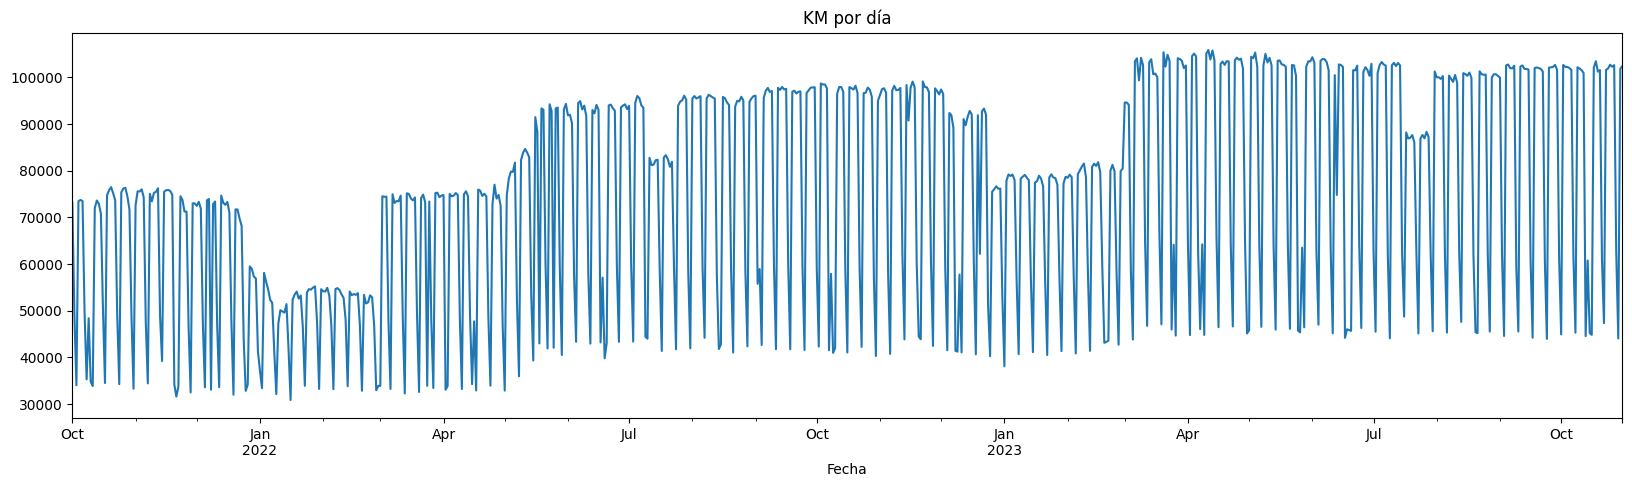

In [245]:
df_km.KM.plot(figsize=(20,5), title = "KM por día")
plt.show()

<Axes: ylabel='KM'>

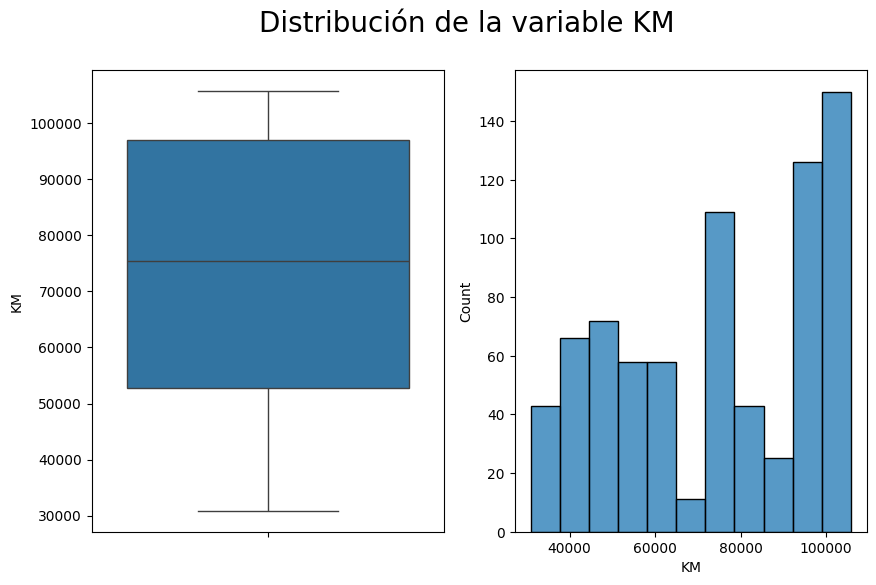

In [246]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle('Distribución de la variable KM', fontsize = 20)


sns.histplot(data = df_km, x="KM", ax = axs[1])
sns.boxplot(y = "KM", data = df_km, ax = axs[0])


La variable parece no seguir una distribución en particular, los kms recorridos por día se encuentran entre 50.000 y 100.000,
siendo este último valor el más frecuente.

### Descomposición de Series Temporales

In [247]:
# Modulo para uso exclusivo aqui
from statsmodels.tsa.seasonal import seasonal_decompose

### Descomposicion Aditiva

In [248]:
df_km = df_km.asfreq('d')

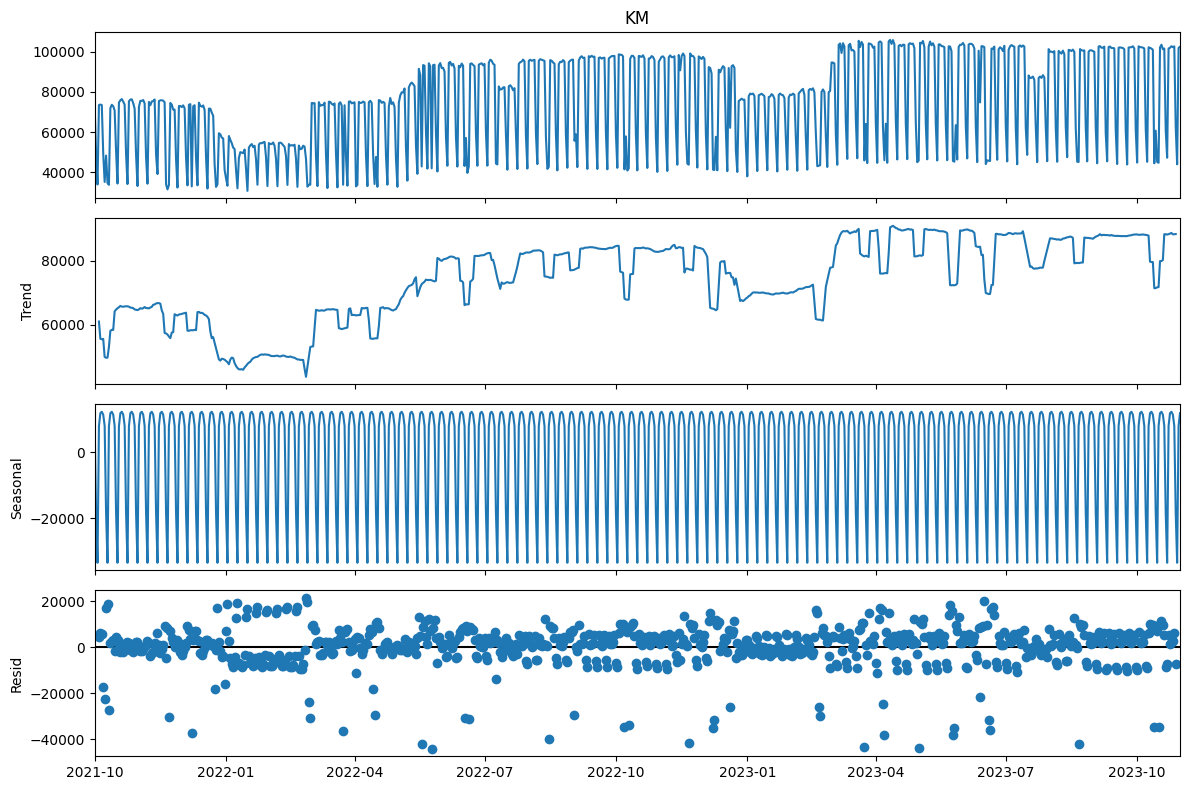

In [249]:
s_dec_additive = seasonal_decompose(df_km.KM, model = "adittive")
plt.rcParams['figure.figsize']=[12.0,8.0]
s_dec_additive.plot()
plt.show()

Al hacer la descomposición de la serie se pueden observar 4 características:
- El ciclo
- La tendencia   
- La estacionalidad.
- Movimientos irregulares ( el error )

In [250]:
s_dec_additive.resid.describe()

count      755.000000
mean        -1.932399
std       9657.372492
min     -44186.242897
25%      -3264.054709
50%       1479.511246
75%       4975.295621
max      21493.939940
Name: resid, dtype: float64

## Distribución de residuos de la descomposición aditiva

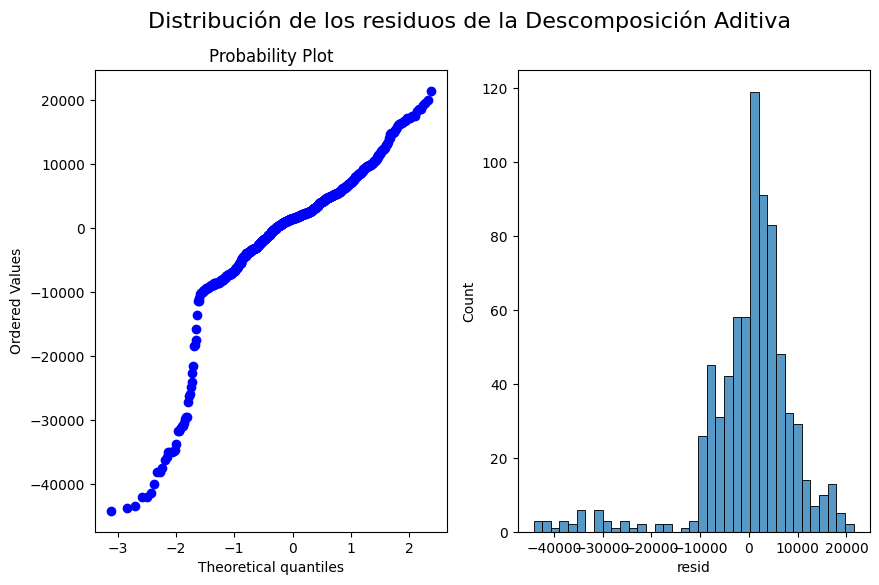

In [251]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle("Distribución de los residuos de la Descomposición Aditiva", size = 16)

probplot(s_dec_additive.resid, plot=axs[0], fit=True, dist='norm');

df = pd.DataFrame({
    'observed': s_dec_additive.observed,
    'trend': s_dec_additive.trend,
    'seasonal': s_dec_additive.seasonal,
    'resid': s_dec_additive.resid
})

sns.histplot(data = df, x='resid', ax = axs[1]);

En base a los gráficos podemos deducir que los residuos de la descomposición aditiva no se distribuyen normalmente.

### Descomposicion Multiplicativa

In [252]:
plt.rcParams['figure.figsize']=[12.0,8.0]

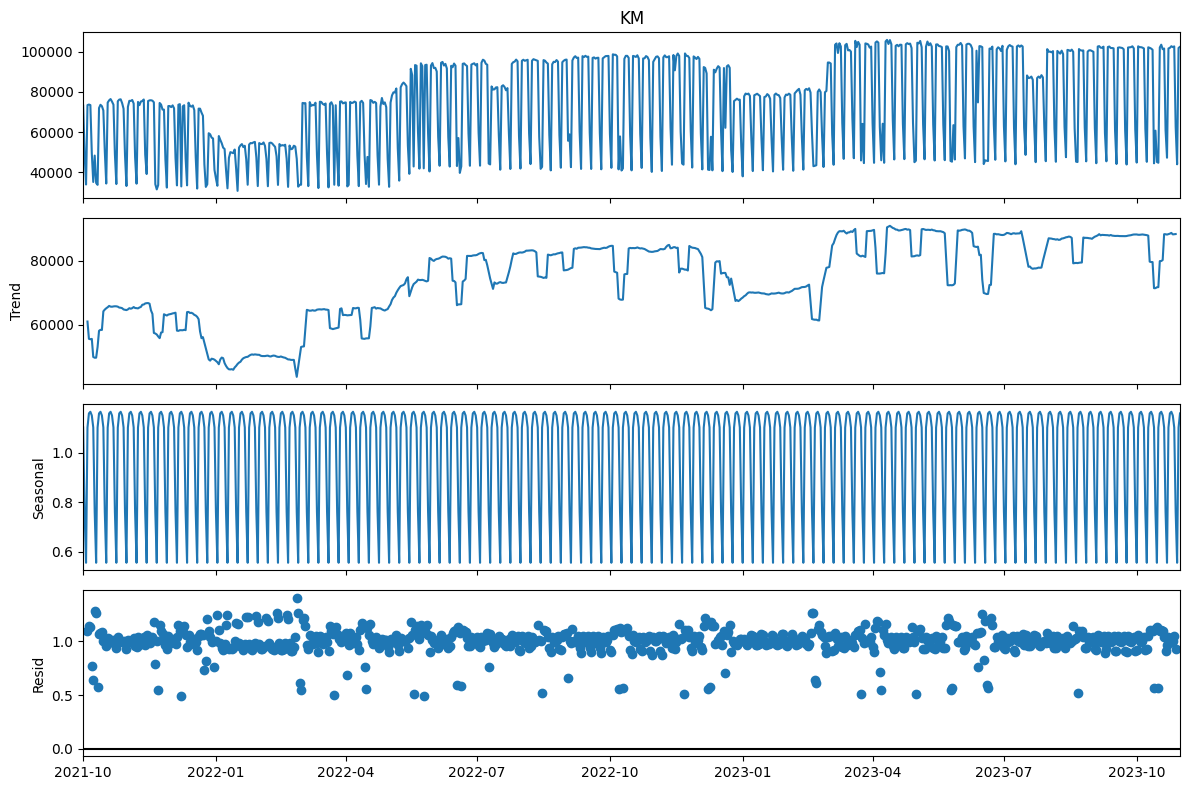

In [253]:
s_dec_multiplicative = seasonal_decompose(df_km.KM, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

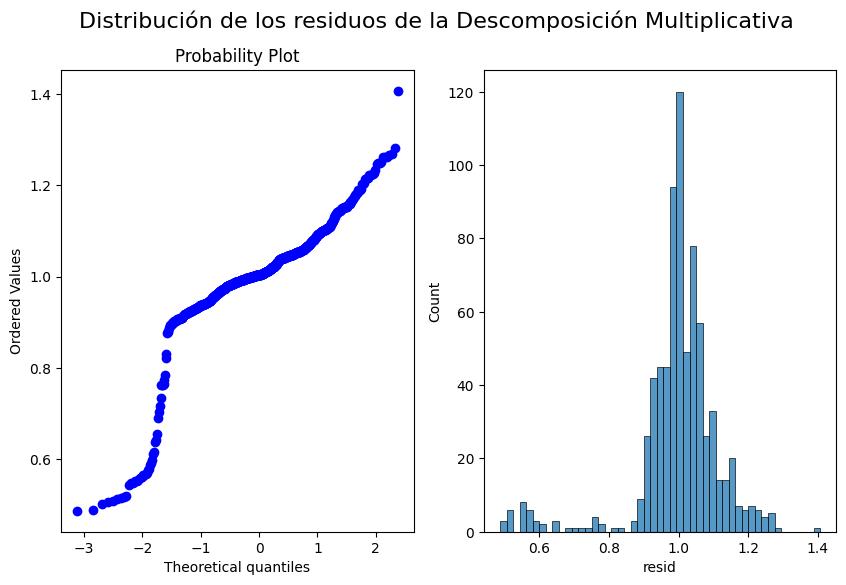

In [254]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle("Distribución de los residuos de la Descomposición Multiplicativa", size = 16)

probplot(s_dec_multiplicative.resid, plot=axs[0], fit=True, dist='norm');

df = pd.DataFrame({
    'observed': s_dec_multiplicative.observed,
    'trend': s_dec_multiplicative.trend,
    'seasonal': s_dec_multiplicative.seasonal,
    'resid': s_dec_multiplicative.resid
})

sns.histplot(data = df, x='resid', ax = axs[1]);

Analizando el QQplot de la diferenciacion multiplicativa es notorio un peor resultado dado a que la serie inicial presenta una apariencia lineal y es mejor aplicar en dicho caso diferenciación aditiva.

### Representación gráfica de la Función de Autocorrelación

In [255]:
# Módulos a utilizar
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [256]:
plt.rcParams['figure.figsize']=[6.0,4.0]

#### Grafico ACF de los KM

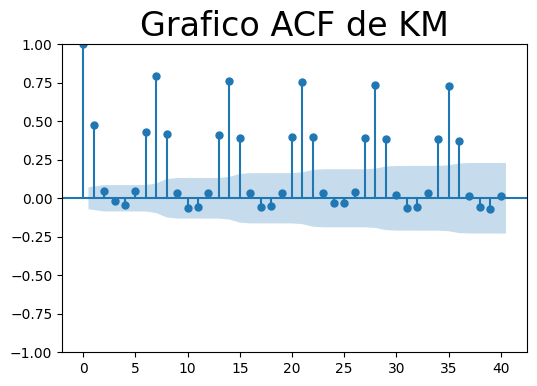

In [257]:
plot_acf(df_km.KM,lags=40)
plt.title("Grafico ACF de KM", size= 24)
plt.show()

Observaciones

El grafico de autocorrelación nos muestra claramente una estacionalidad y por lo tanto una primera aproximación de no estacionariedad dado a que se presentan muchos valores por fuera del intervalo de confianza. Tampoco no se alcanza a percibir un decrecimiento lineal con tendencia a bajar en el tiempo.
Por lo tanto se necesita aplicar un metodo de transformación para conseguir la misma.

### Transformaciones

Ahora vamos a calcular cuantas transformaciones se necesitan.

In [258]:
print(pm.arima.ndiffs(df_km.KM))

1


Aplicamos transformación de la serie para lograr estacionariedad (periodo semanal)

In [259]:
# Diferencia de la serie con periodo 7 dado a que los datos presentan una estacionalidad semanal
km_diff_7= df_km.copy()
km_diff_7=km_diff_7.diff(axis = 0, periods = 7)
km_diff_7.dropna(inplace = True)

In [260]:
km_diff_7.head(10)

,KM
Fecha,
2021-10-08,-37894.764
2021-10-09,-915.474
2021-10-10,760.479
2021-10-11,-39601.280
2021-10-12,-1722.518
2021-10-13,134.040
2021-10-14,23430.614
2021-10-15,35496.793
2021-10-16,2144.720


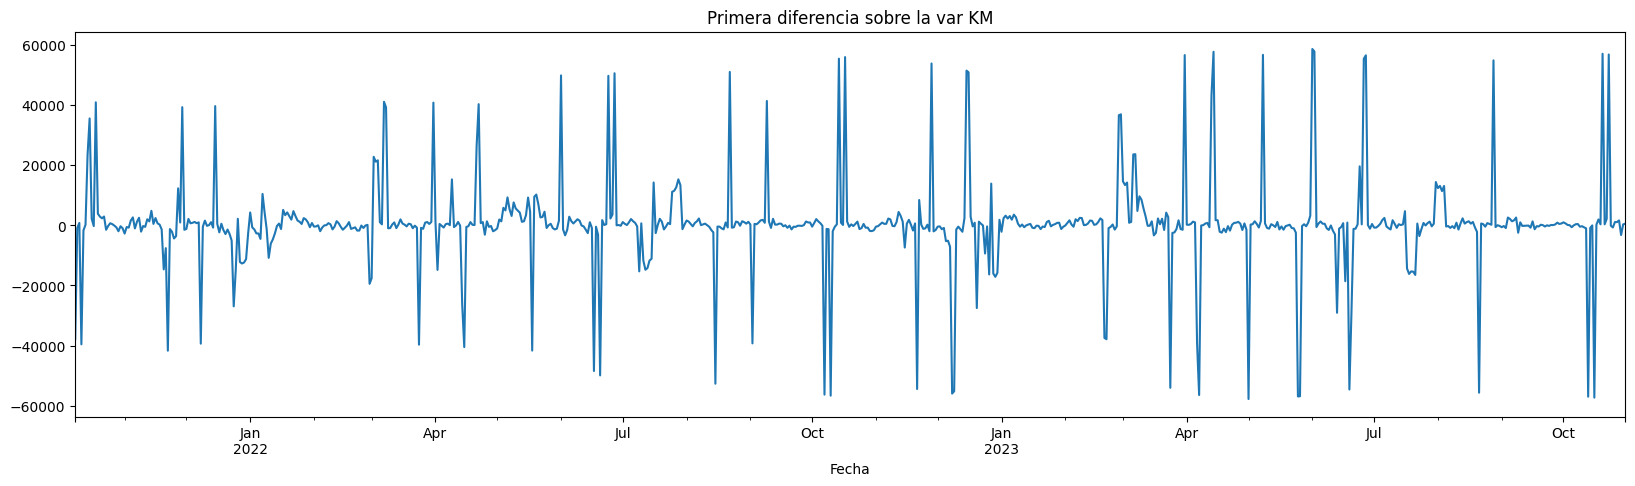

In [261]:
#grafico de la serie diferenciada para la var KM
km_diff_7.KM.plot(figsize=(20,5), title = "Primera diferencia sobre la var KM")
plt.show()

Observaciones

La grafica de la primera diferencia de la serie original muestra característica de Ruido blanco que son;
la reversión a la media con un valor constante esperado igual a cero y volatilidad constante en el tiempo.

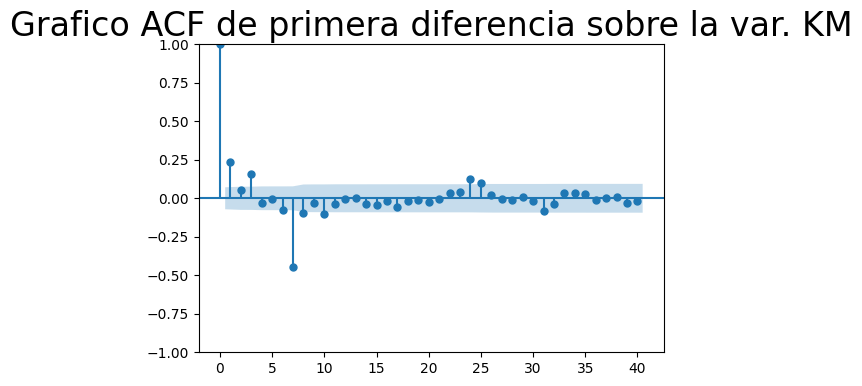

In [262]:
plot_acf(km_diff_7.KM,lags=40)
plt.title("Grafico ACF de primera diferencia sobre la var. KM", size= 24)
plt.show()

Observación

Vemos en la función de autocorrelación de la primera diferencia de la serie original un cambio muy marcado dado a que se percibe como desaparece le patron estacional respecto a la grafica de ACF de la serie original.

#### Ruido Blanco

In [265]:
wn = np.random.normal(loc = df_km.KM.mean(), scale = df_km.KM.std(), size = len(df_km))
df_km['wn'] = wn
df_km.describe()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

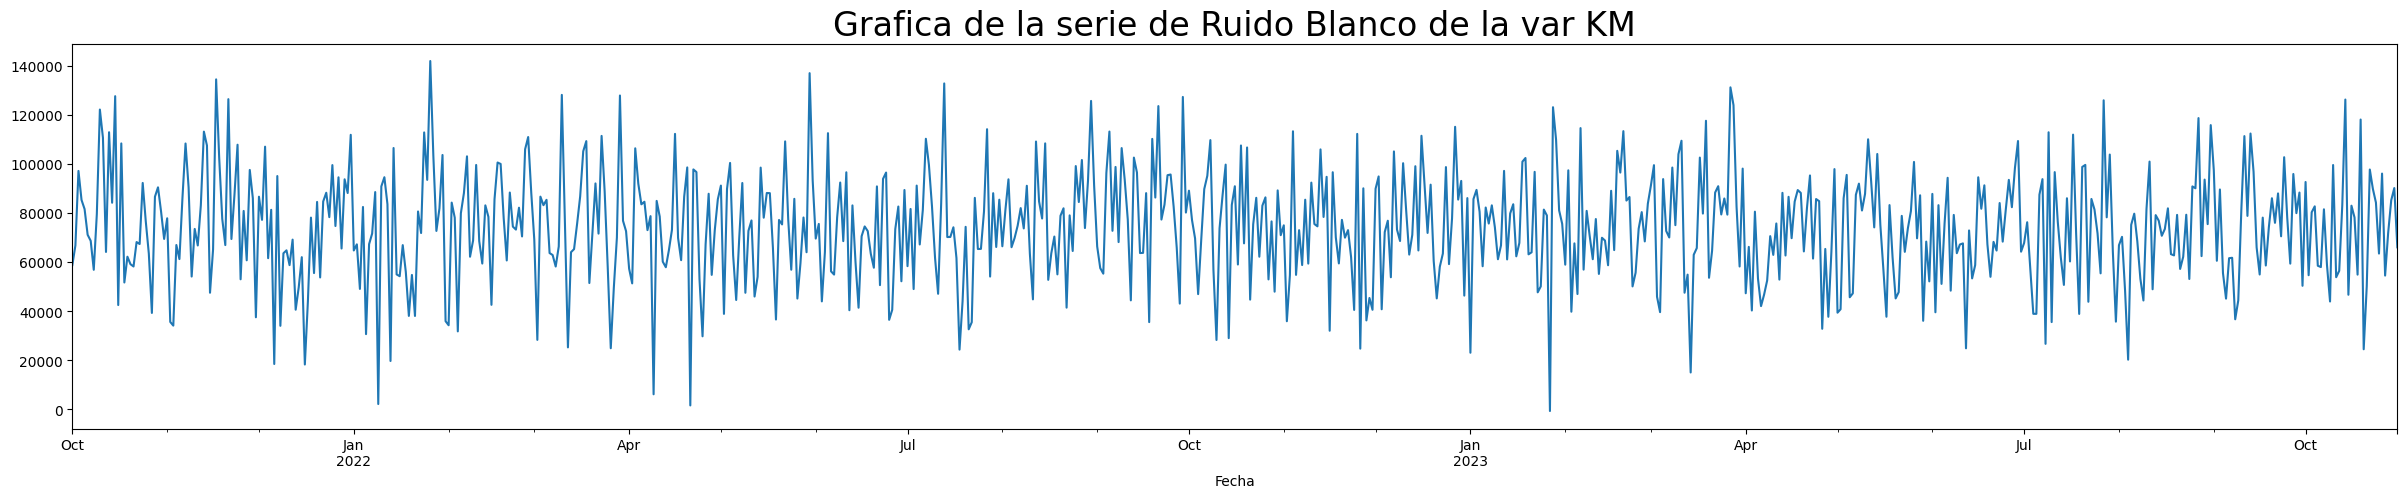

In [164]:
df_km.wn.plot(figsize = (30,5))
plt.title("Grafica de la serie de Ruido Blanco de la var KM", size= 24)
plt.show()

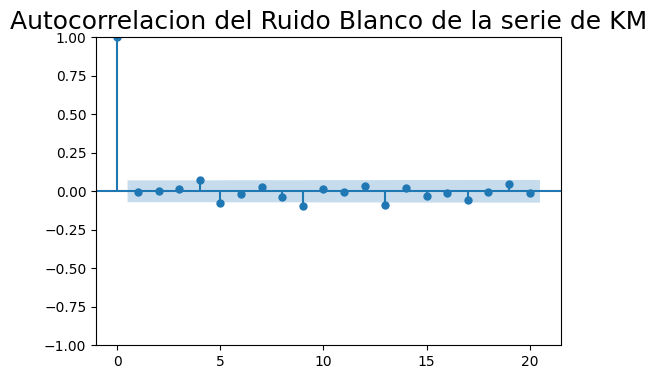

In [165]:
plot_acf(df_km.wn, lags=20)
plt.title("Autocorrelacion del Ruido Blanco de la serie de KM", size= 18)
plt.show()

## Punto 3
Graficas de FAS, FAC y FACP

In [166]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as tsa

In [167]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2,figsize=(18,10),sharex=True, sharey=False )
  axes[2,0].set_xlabel('Lag')
  axes[2,1].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Serie KM')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')

  plot_acf(serie_nr, lags=nrol, ax= axes[0,1], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Serie KM diferenciado')
  plot_pacf(serie_nr, lags=nrol, ax= axes[1,1], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,1].plot(tsa.acovf(serie_nr,fft=False, nlag=nrol), color='r', label='AutoCov')

  p1.legend()
  plt.show()

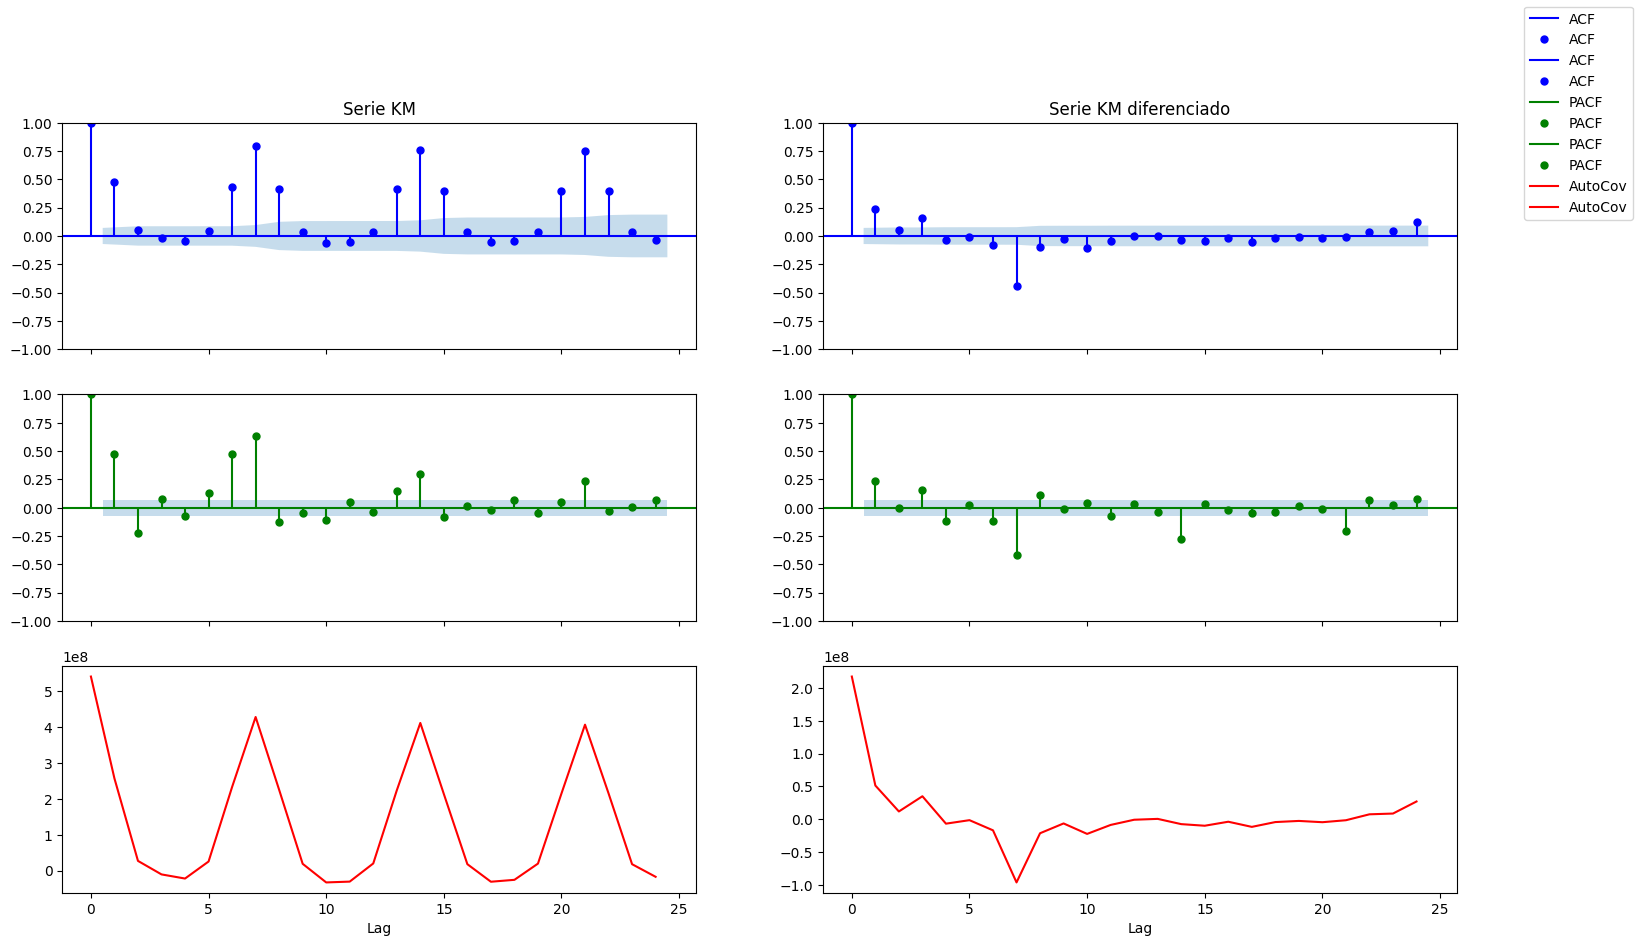

In [168]:
autocov_autocorr(df_km.KM, km_diff_7.KM, nrol= 24 )

# Pregunta 4

Realizar distintas pruebas de raíces unitarias para determinar si las series elegidas son o no estacionarias.

In [169]:
from statsmodels.tsa.stattools import adfuller

In [170]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
  print (f'Results of Dickey-Fuller Test for column: {column_name}')
  dftest = adfuller(series, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
  if dftest[1] <= 0.05:
    print("Conclusion:====>")
    print("Reject the null hypothesis")
    print("Data is stationary")
  else:
    print("Conclusion:====>")
    print("Fail to reject the null hypothesis")
    print("Data is non-stationary")

In [171]:
# Aplicamos Dicky Fuller aumentado a la serie origina
Augmented_Dickey_Fuller_Test_func(df_km.KM,'KM')

Results of Dickey-Fuller Test for column: KM
Test Statistic                  -1.585677
p-value                          0.490784
No Lags Used                    20.000000
Number of Observations Used    740.000000
Critical Value (1%)             -3.439218
Critical Value (5%)             -2.865454
Critical Value (10%)            -2.568854
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [172]:
# Dicky Fuller aumentado de la Serie diferenciada
Augmented_Dickey_Fuller_Test_func(km_diff_7.KM ,'KM')

Results of Dickey-Fuller Test for column: KM
Test Statistic                -9.801399e+00
p-value                        5.981769e-17
No Lags Used                   2.000000e+01
Number of Observations Used    7.330000e+02
Critical Value (1%)           -3.439303e+00
Critical Value (5%)           -2.865491e+00
Critical Value (10%)          -2.568874e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


## Punto 5

Efectuar una estimación de la serie temporal con distintos órdenes de parámetros de modelos SARIMA y encontrar aquel que se ajuste mejor a los datos (pueden emplear Criterios de Información/Selección y analizar significatividad individual global de los parámetros del modelo).

In [173]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.tsa.stattools as tsa
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import ADFTest

In [174]:
def estacionario(y):
  # Estimado de número de diferencias con ADF test:Dickey-Fuller
  n_adf = ndiffs(y, test='adf')  # -> 0

  # KPSS test (auto_arima default): Kwiatkowski-Phillips-Schmidt-Shin
  n_kpss = ndiffs(y, test='kpss')  # -> 0

  # PP test: Phillips-Perron
  n_pp = ndiffs(y, test='pp')  # -> 0

  print('Estimado de número de diferencias con ADF test')
  print(n_adf)

  print('Estimado de número de diferencias con KPSS test')
  print(n_kpss)

  print('Estimado de número de diferencias con PP test')
  print(n_pp)

  print('Se debe realizar diferenciación (should_diff) ADF Test')
  adftest = ADFTest(alpha=0.05)
  print(adftest.should_diff(y))

In [175]:
def print_test_afd(y):
  resultado = tsa.adfuller(y)
  print('Estadistico ADF: %f' % resultado[0])
  print('p-valor: %f' % resultado[1])
  print('Valores criticos:')
  for key, valor in resultado[4].items():
    print('\t%s: %.3f' % (key, valor))

In [176]:
estacionario(df_km.KM)

Estimado de número de diferencias con ADF test
0
Estimado de número de diferencias con KPSS test
1
Estimado de número de diferencias con PP test
0
Se debe realizar diferenciación (should_diff) ADF Test
(0.01, False)


In [177]:
print_test_afd(df_km.KM)

Estadistico ADF: -1.585677
p-valor: 0.490784
Valores criticos:
	1%: -3.439
	5%: -2.865
	10%: -2.569


### SARIMA

In [178]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [179]:
# Separacion Train/Test
# Seleccionamos el primer 80% para train
train = df_km.KM.iloc[:round(len(df_km)*.80)]

# Seleccionamos el 20% restante para test
test = df_km.KM.iloc[round(len(df_km)*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train)
print(test)


Fecha
2021-10-01     73177.190
2021-10-02     49300.256
2021-10-03     34024.972
2021-10-04     73453.515
2021-10-05     73722.635
                 ...    
2023-05-28     46429.980
2023-05-29    102266.295
2023-05-30    103408.078
2023-05-31    103403.519
2023-06-01    104291.072
Freq: D, Name: KM, Length: 609, dtype: float64
Fecha
2023-06-02    103121.540
2023-06-03     62877.695
2023-06-04     46983.239
2023-06-05    103512.439
2023-06-06    103902.764
                 ...    
2023-10-27    102590.551
2023-10-28     62622.827
2023-10-29     44060.420
2023-10-30    101843.308
2023-10-31    102381.640
Freq: D, Name: KM, Length: 152, dtype: float64


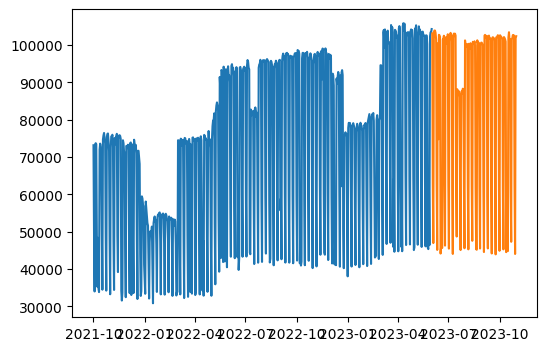

In [180]:
# Visualización Train - Test

plt.plot(train)
plt.plot(test)

In [181]:
from pmdarima.arima import auto_arima, ndiffs, nsdiffs

In [182]:
# Pruebo el autoarima sin estacionalidad ( " seasonal = False ")
auto_arima(train, start_p=0, max_p=7, start_d=0, max_d=7, start_q=0, max_q=7,
           start_P=0, max_P=7, start_D=0, max_D=7, start_Q=0, max_Q=7,
           seasonal=False, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13942.108, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13936.796, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13801.743, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13940.112, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13746.413, Time=1.40 sec


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13680.220, Time=1.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13861.556, Time=0.50 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13674.571, Time=1.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=13850.993, Time=0.33 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=13603.706, Time=1.14 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=13802.300, Time=0.51 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=13466.361, Time=1.46 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=13611.062, Time=0.87 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=13279.915, Time=2.60 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=13281.298, Time=1.61 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=13280.067, Time=4.71 sec
 ARIMA(6,1,2)(0,0,0)[0] intercept   : AIC=13280.770, Time=3.79 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=13352.790, Time=4.18 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=13279.555, Time=1.94 sec
 ARIMA(7,1,0)(0,0,0)[0]             : AIC=13277.816, Time=1.26

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  609
Model:               SARIMAX(7, 1, 0)   Log Likelihood               -6630.908
Date:                Thu, 07 Dec 2023   AIC                          13277.816
Time:                        00:20:32   BIC                          13313.097
Sample:                    10-01-2021   HQIC                         13291.542
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6866      0.034    -19.963      0.000      -0.754      -0.619
ar.L2         -0.7844      0.038    -20.646      0.000      -0.859      -0.710
ar.L3         -0.6790      0.038    -17.851      0.000      -0.754      -0.604
ar.L4         -0.7315      0.036    -20.266      0.000      -0.802      -0.661
ar.L5         -0.7051      0.041    -17.151      0.000      -0.786      -0.625
ar.L6         -0.5934      0.034    -17.655      0.000      -0.659      -0.528
ar.L7          0.0809      0.035      2.292      0.022       0.012       0.150
sigma2      1.688e+08    2.3e-10   7.36e+17      0.000    1.69e+08    1.69e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               543.61
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.84   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.43e+32. Standard errors may be unstable.
"""

In [183]:
# Entrenamiento del modelo SARIMA sin estacionalidad 
modelo_arima = sm.tsa.arima.ARIMA(train, order=(7,1,0), seasonal_order=(0, 0, 0, 0))
modelo_arima = modelo_arima.fit()
modelo_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     KM   No. Observations:                  609
Model:                 ARIMA(7, 1, 0)   Log Likelihood               -6630.908
Date:                Thu, 07 Dec 2023   AIC                          13277.816
Time:                        00:20:33   BIC                          13313.097
Sample:                    10-01-2021   HQIC                         13291.542
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6866      0.034    -19.963      0.000      -0.754      -0.619
ar.L2         -0.7844      0.038    -20.646      0.000      -0.859      -0.710
ar.L3         -0.6790      0.038    -17.851      0.000      -0.754      -0.604
ar.L4         -0.7315      0.036    -20.266      0.000      -0.802      -0.661
ar.L5         -0.7051      0.041    -17.151      0.000      -0.786      -0.625
ar.L6         -0.5934      0.034    -17.655      0.000      -0.659      -0.528
ar.L7          0.0809      0.035      2.292      0.022       0.012       0.150
sigma2      1.688e+08    2.3e-10   7.36e+17      0.000    1.69e+08    1.69e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               543.61
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.84   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.43e+32. Standard errors may be unstable.
"""

# Analisis de residuos del modelo ARIMA

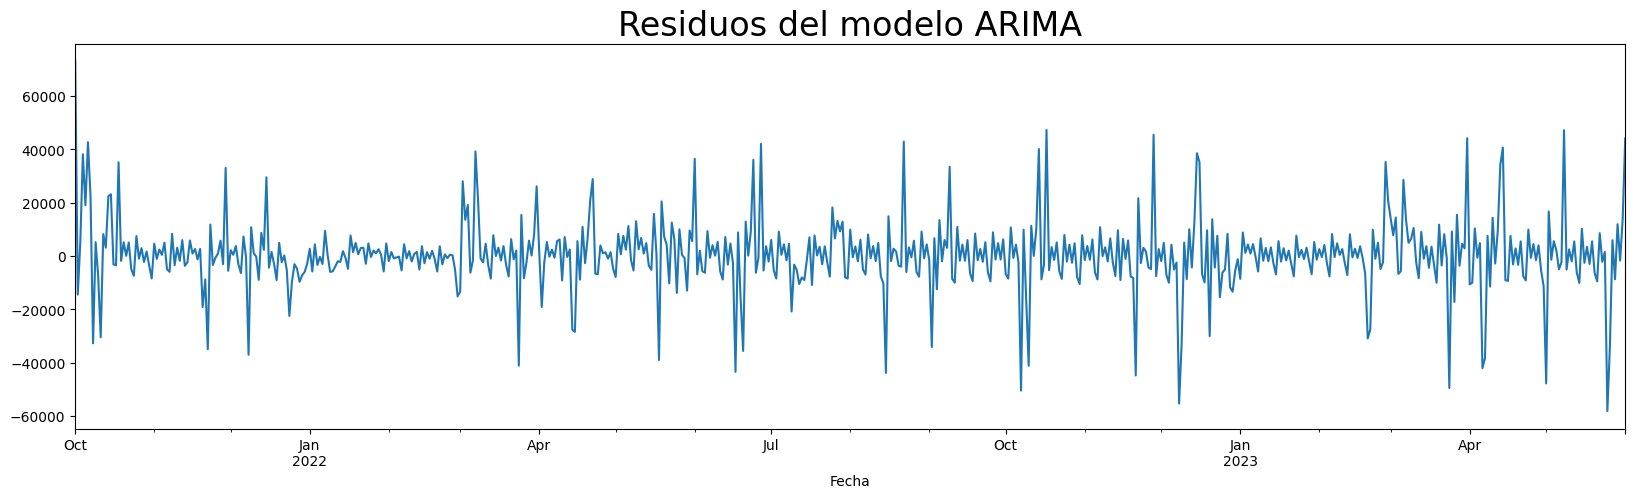

In [184]:
modelo_arima.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo ARIMA",size=24)
plt.show()

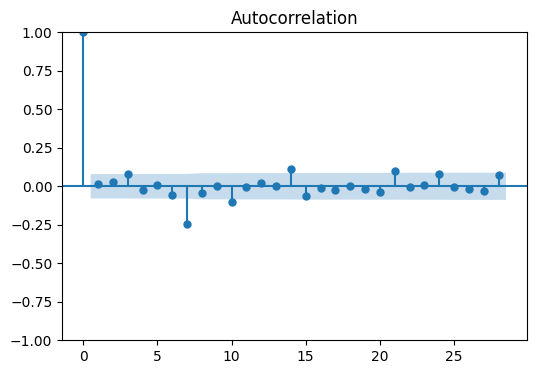

In [185]:
plot_acf(modelo_arima.resid);

In [186]:
import scipy.stats
import pylab

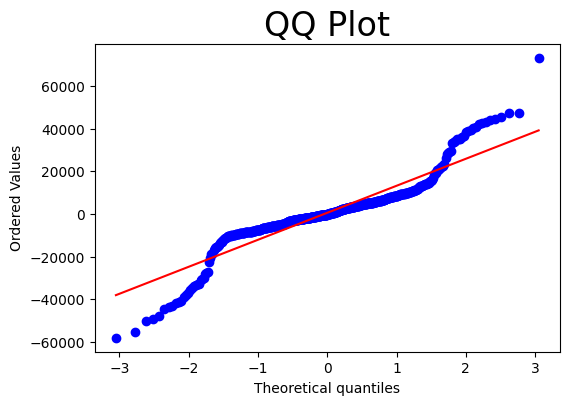

In [187]:
import scipy
scipy.stats.probplot(modelo_arima.resid, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

In [188]:
#Test de Ljung-Box
Incorr_residuos_modelo_arima = sm.stats.acorr_ljungbox(modelo_arima.resid, lags=25)

In [189]:
Incorr_residuos_modelo_arima

,lb_stat,lb_pvalue
1,0.130369,7.180500e-01
2,0.638329,7.267560e-01
3,4.740837,1.917881e-01
4,5.016122,2.856473e-01
5,5.046020,4.102898e-01
6,7.151870,3.070306e-01
7,43.815770,2.319977e-07
8,44.993291,3.690773e-07
9,44.993526,9.252102e-07
10,51.100139,1.673671e-07


Text(0, 0.5, 'P-valores ')

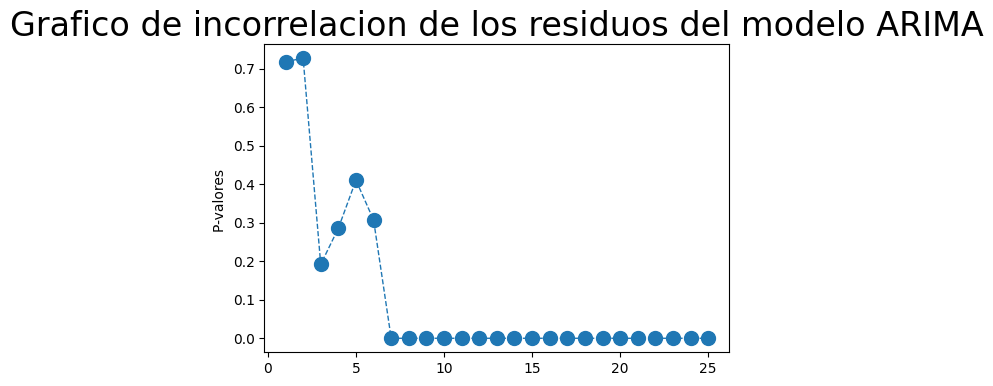

In [190]:
plt.plot(Incorr_residuos_modelo_arima.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1)
plt.title("Grafico de incorrelacion de los residuos del modelo ARIMA", size= 24)
plt.ylabel("P-valores ")

Se observa que a partir del lag 7 se acercan los valores del p-value a 0.05 en donde se estabiliza el error de la serie.

### Predicciones ARIMA

In [191]:
# Predicciones del modelo ARIMA
predicciones_arima = modelo_arima.get_forecast(len(test))

In [192]:
#Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="KM"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

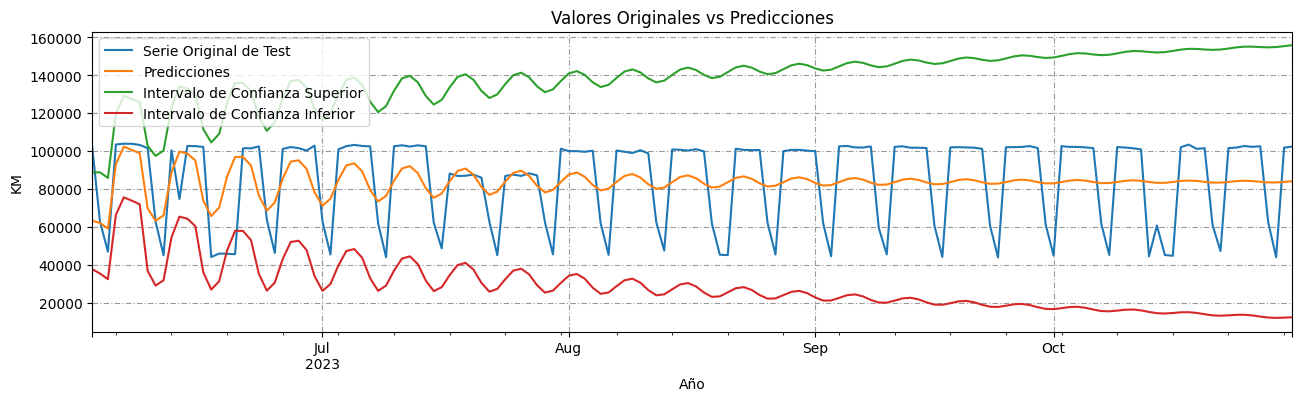

In [193]:
graficar_pred(test, predicciones_arima.predicted_mean, predicciones_arima.conf_int())

In [194]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [195]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [196]:
evaluar_metricas(test, predicciones_arima.predicted_mean)

MSE: 443225638.49782574
MAE: 18493.774180309225
RMSE: 21052.924701756423
MAPE: 0.2736


Se evidencia que las pronosticos para los primeros lags parecen apropiados pero en el tiempo tienden a ser muy malos dado a que se partio de un modelo sin considerar la estacionalidad. Por lo cual la curva de prediccion no puede copiar esa estacionalidad de la serie original.

Utilizando los análisis realizados sobre la serie se realizarán los siguientes ajustes sobre los parámetros del AutoArima:

Se setea el parámetro m = 7, ya que la serie tiene valores diarios con una estacionalidad por semana como se vio en las gráficas anteriores.

Se realiza 1 diferenciación en el período estacional, por lo que se setea el parámetro D = 1.

Como no hay que realizar una diferenciación fuera del período estacional el parámetro d se setea igual a 0, d = 0.

Se consultó la siguiente documentación:

https://alkaline-ml.com/pmdarima/tips_and_tricks.html

https://people.duke.edu/~rnau/seasarim.htm#outline

In [197]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA
# teniendo en cuanta la estacionalidad de 7 dias
# Realizar la búsqueda de cuadrícula de hiperparámetros
auto_arima(train, start_p=0, max_p=7, start_d=1, max_d=7, start_q=0, max_q=7,
           start_P=0, max_P=7, start_D=0, max_D=7, start_Q=0, max_Q=7,
           seasonal=True, m=7, trace=True, stepwise=True,
          information_criterion='bic', alpha=0.05).summary()

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : BIC=13950.928, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : BIC=13641.010, Time=0.39 sec


 ARIMA(0,1,1)(0,0,1)[7] intercept   : BIC=13568.048, Time=1.76 sec
 ARIMA(0,1,0)(0,0,0)[7]             : BIC=13944.522, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : BIC=13814.974, Time=0.32 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : BIC=inf, Time=2.42 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : BIC=13574.443, Time=2.61 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : BIC=inf, Time=1.13 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : BIC=inf, Time=3.88 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : BIC=13782.619, Time=0.22 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : BIC=13605.974, Time=2.63 sec
 ARIMA(0,1,2)(0,0,1)[7] intercept   : BIC=13518.391, Time=0.51 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : BIC=13691.778, Time=0.57 sec
 ARIMA(0,1,2)(1,0,1)[7] intercept   : BIC=13293.911, Time=3.40 sec
 ARIMA(0,1,2)(1,0,0)[7] intercept   : BIC=inf, Time=2.19 sec
 ARIMA(0,1,2)(2,0,1)[7] intercept   : BIC=13303.263, Time=4.29 sec
 ARIMA(0,1,2)(1,0,2)[7] intercept   : BIC=13303.522, Time=5.55 sec
 ARIMA(0,1,2)(0,0,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  609
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -6627.725
Date:                             Thu, 07 Dec 2023   AIC                          13267.450
Time:                                     00:21:59   BIC                          13293.911
Sample:                                 10-01-2021   HQIC                         13277.745
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.3537     14.207      0.518      0.605     -20.492      35.199
ma.L1         -0.6545      0.067     -9.759      0.000      -0.786      -0.523
ma.L2         -0.2728      0.081     -3.351      0.001      -0.432      -0.113
ar.S.L7        0.9793      0.022     44.014      0.000       0.936       1.023
ma.S.L7       -0.8052      0.086     -9.397      0.000      -0.973      -0.637
sigma2      2.956e+08    2.7e-06   1.09e+14      0.000    2.96e+08    2.96e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1411.42
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                            -1.83
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.19e+29. Standard errors may be unstable.
"""

In [198]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [199]:
modelo_sarima = SARIMAX(train, order=(0,1,2), seasonal_order=(1,0,1,7))
modelo_sarima = modelo_sarima.fit()

print(modelo_sarima.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                  KM   No. Observations:                  609
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -6551.877
Date:                             Thu, 07 Dec 2023   AIC                          13113.753
Time:                                     00:22:04   BIC                          13135.804
Sample:                                 10-01-2021   HQIC                         13122.332
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6135      0.029    -21.480      0.000      -0.669      -0.558
ma.L2         -0.2892      

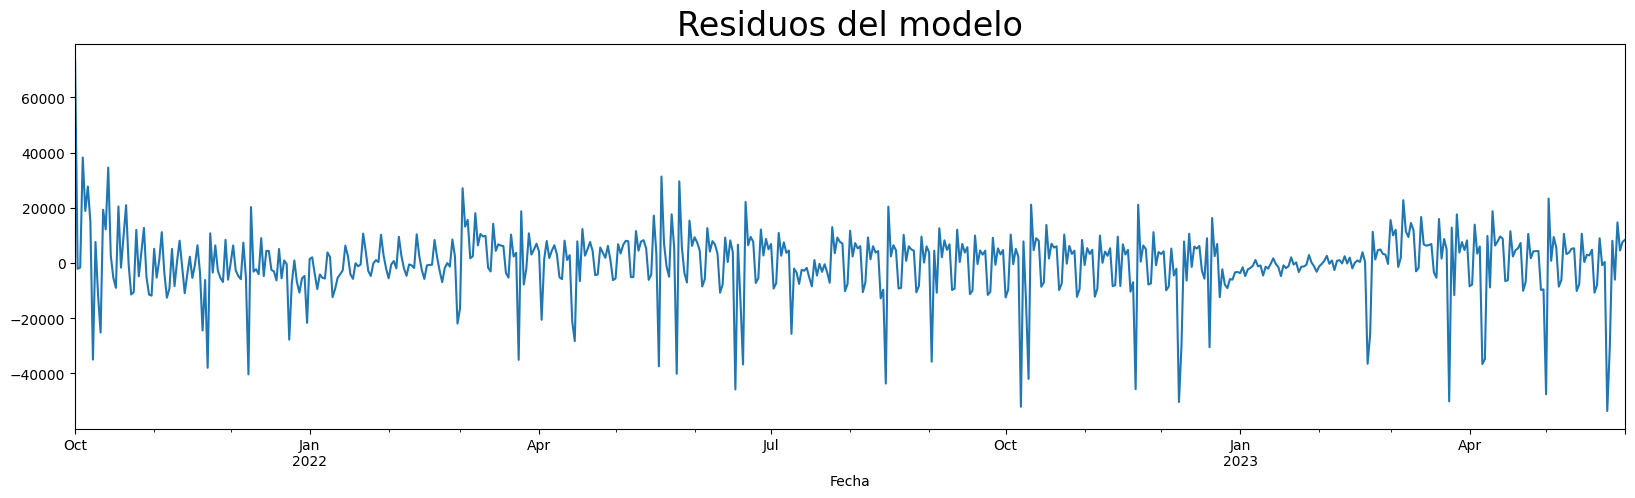

In [200]:
modelo_sarima.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo",size=24)
plt.show()

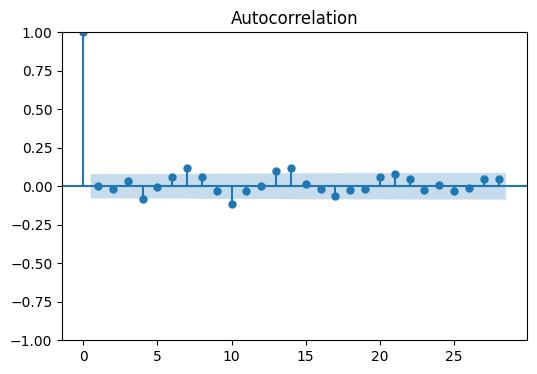

In [201]:
plot_acf(modelo_sarima.resid);

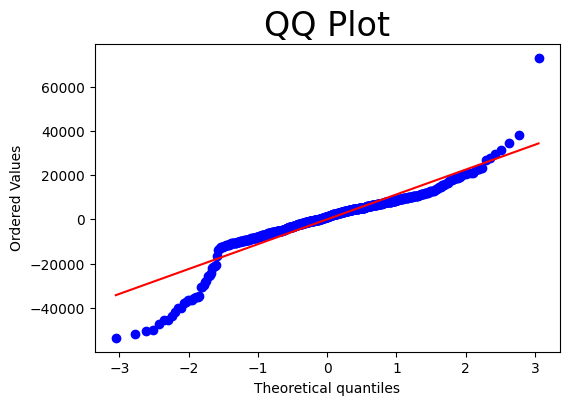

In [202]:
scipy.stats.probplot(modelo_sarima.resid, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

In [203]:
# Test de Ljung-Box
Incorr_residuos_modelo_sarima = sm.stats.acorr_ljungbox(modelo_sarima.resid, lags=25)

In [204]:
Incorr_residuos_modelo_sarima

,lb_stat,lb_pvalue
1,0.003846,0.950548
2,0.205610,0.902303
3,1.000111,0.801225
4,5.455205,0.243695
5,5.457934,0.362581
6,7.814991,0.251973
7,16.497930,0.020937
8,18.589323,0.017217
9,19.176735,0.023731
10,27.640559,0.002060


Text(0, 0.5, 'P-valores ')

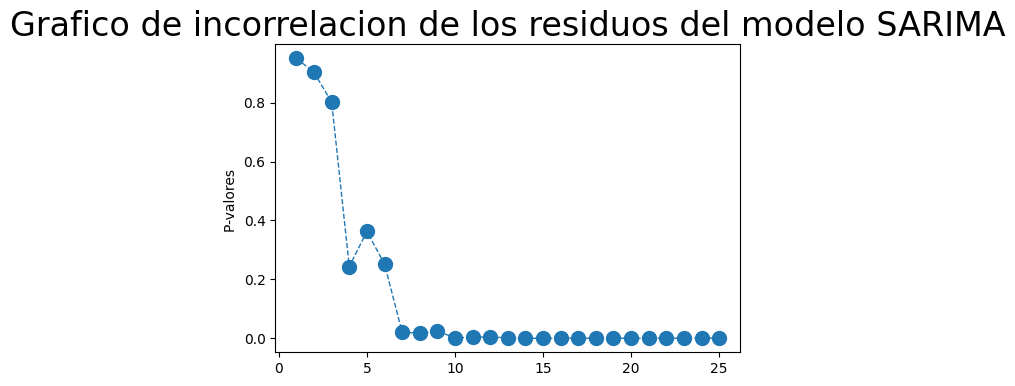

In [205]:
plt.plot(Incorr_residuos_modelo_sarima.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1)
plt.title("Grafico de incorrelacion de los residuos del modelo SARIMA", size= 24)
plt.ylabel("P-valores ")

Se observa que a partir del lag 7 se acercan los valores del p-value a 0.05 en donde se estabiliza el error de la serie.

### Predicciones SARIMA

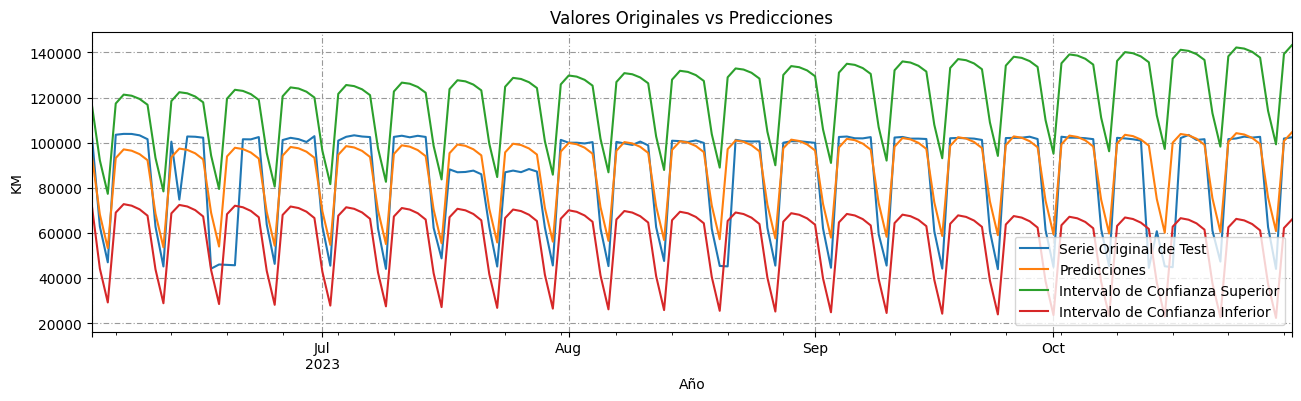

In [206]:
predicciones_sarima = modelo_sarima.get_forecast(len(test))

# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test, predicciones_sarima.predicted_mean, predicciones_sarima.conf_int())

## Conclusión

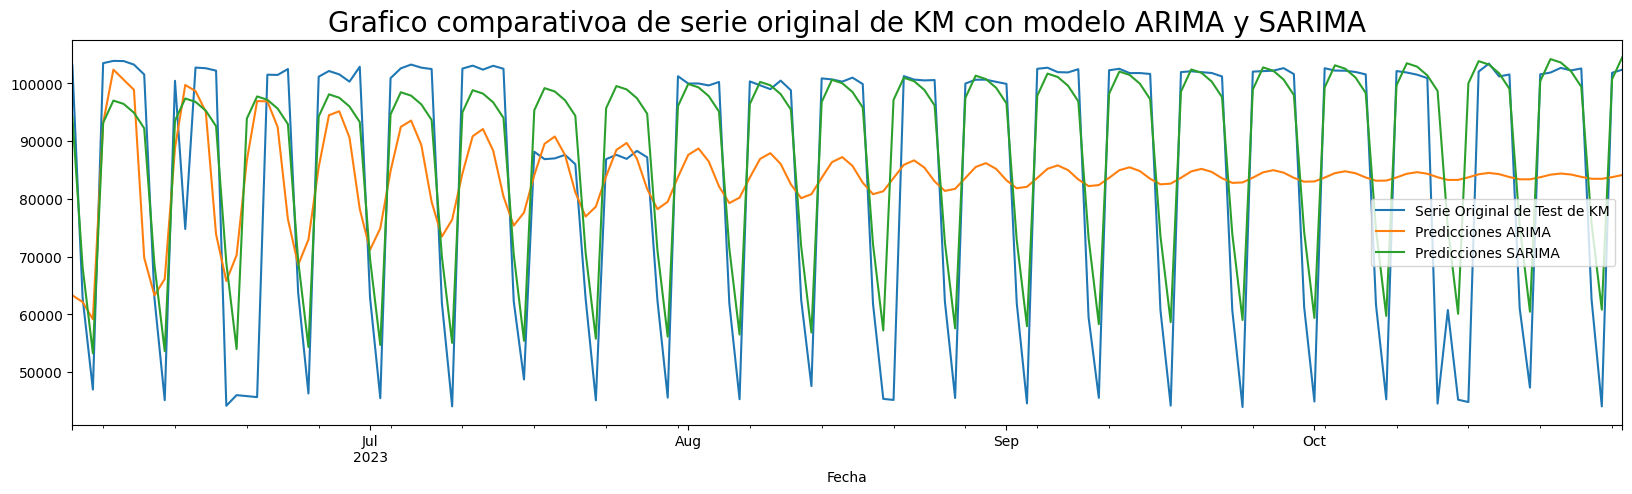

In [207]:
test.plot(label="Serie Original de Test de KM", figsize=(20,5))
plt.title("Grafico comparativoa de serie original de KM con modelo ARIMA y SARIMA", size= 20)
predicciones_arima.predicted_mean.plot(label="Predicciones ARIMA")
predicciones_sarima.predicted_mean.plot(label="Predicciones SARIMA")
plt.legend()

In [208]:
datos = {'Modelos': ['SARIMA','ARIMA'],
         'AIC': [modelo_sarima.aic, modelo_arima.aic],
         'BIC': [modelo_sarima.bic, modelo_arima.bic],
         'MAE': [modelo_sarima.mae, modelo_arima.mae],
         'MSE': [modelo_sarima.mse, modelo_arima.mse]}


modelos_residuos = pd.DataFrame(datos)
modelos_residuos

,Modelos,AIC,BIC,MAE,MSE
0,SARIMA,13113.753310,13135.804184,8056.721289,1.445694e+08
1,ARIMA,13277.815875,13313.097275,8511.664988,1.845237e+08


## Modelo definitivo - Predicciones

Se escogio como mejor modelo el SARIMA. Y se procede a reentrenar con el total de la serie sobre l vaariable KM para recalibrar el modelo. Y luego se realizan predicciones futuras.

In [267]:
# Reentrenar el modelo con todos los datos disponibles
import statsmodels.api as sm

# Crear un nuevo modelo SARIMA utilizando todos los datos
nuevo_modelo = sm.tsa.SARIMAX(df_km['KM'], order=(0,1,2), seasonal_order=(1,0,1,7)).fit()

# Imprimir el resumen del nuevo modelo
print(nuevo_modelo.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                  KM   No. Observations:                  761
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -8298.627
Date:                             Thu, 07 Dec 2023   AIC                          16607.255
Time:                                     00:52:07   BIC                          16630.421
Sample:                                 10-01-2021   HQIC                         16616.176
                                      - 10-31-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6438      0.061    -10.552      0.000      -0.763      -0.524
ma.L2         -0.2682      

In [271]:
# Se considera una semana del mes de Noviembre del 2023
fechas_prediccion = pd.date_range(start='2023-11-01', end='2023-11-07', freq='D')

# Utilizar el modelo para hacer predicciones
predicciones = nuevo_modelo.get_prediction(start=fechas_prediccion[0], end=fechas_prediccion[-1], dynamic=False)

# Extraer los valores predichos y los intervalos de confianza
prediccion_media = predicciones.predicted_mean
intervalo_confianza = predicciones.conf_int()

# Imprimir los resultados
resultados = pd.DataFrame({'Prediccion': prediccion_media, 'Intervalo de Confianza': intervalo_confianza.values.tolist()}, index=fechas_prediccion)
print(resultados)

               Prediccion                    Intervalo de Confianza
2023-11-01  100927.724150     [65748.0478263647, 136107.4004727391]
2023-11-02   99778.118370   [62433.60849235083, 137122.62824689905]
2023-11-03   95307.307143  [57834.703587544434, 132779.91069796818]
2023-11-04   64062.218924  [26461.958067780142, 101662.47977975839]
2023-11-05   48731.124973    [11003.63876331404, 86458.61118185705]
2023-11-06   93774.522536  [55920.238565736516, 131628.80650631027]
2023-11-07   99650.851612   [61670.19319024801, 137631.51003337456]
